**Run the two cells below before you begin. These will set the notebook to autosave every 10 seconds, import the necessary libraries for this challenge, and set figure appearance.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['font.size'] = 4

**To begin, import data set `cleaned_data.csv` and create lists of feature names for the remaining financial features: `'BILL_AMT1'`, `'BILL_AMT2'`, `'BILL_AMT3'`, `'BILL_AMT4'`, `'BILL_AMT5'`, `'BILL_AMT6'`,  `'PAY_AMT1'`, `'PAY_AMT2'`, `'PAY_AMT3'`, `'PAY_AMT4'`, `'PAY_AMT5'`, and `'PAY_AMT6'`.**

**Name the features `bill_feats` and `pay_amt_feats`, respectively.**

In [3]:
# Import the dataset
df=pd.read_csv("/content/cleaned_data.csv")

In [4]:
# Create lists `bill_feats` and `pay_amt_feats`
bill_feats = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_amt_feats = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

____________________________________________________________________________________
**Next, use `.describe()` to examine statistical summaries of the bill amount features**


In [5]:
df[bill_feats].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,8417.000000,8417.000000,8417.000000,8417.000000,8417.000000,8417.000000
mean,50305.650469,48304.080195,45563.479149,40783.016395,39539.095046,37899.048355
std,72050.629350,69575.381244,66480.743780,61284.384395,59264.585052,58618.616674
min,-15308.000000,-33350.000000,-34041.000000,-170000.000000,-28335.000000,-339603.000000
25%,3518.000000,2942.000000,2480.000000,2000.000000,1483.000000,957.000000
50%,22236.000000,21146.000000,19836.000000,18468.000000,17710.000000,16523.000000
75%,65935.000000,63396.000000,58789.000000,50095.000000,49723.000000,48468.000000
max,630458.000000,646770.000000,693131.000000,628699.000000,503914.000000,699944.000000


Reflect on what you see. Does it make sense?

___________________________________________________________________________________
**Then you should visualize the bill amount features using a 2 by 3 grid of histogram plots.**
> Hint: You can use 20 bins for this visualization.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa456ba0c50>,
      dtype=object)

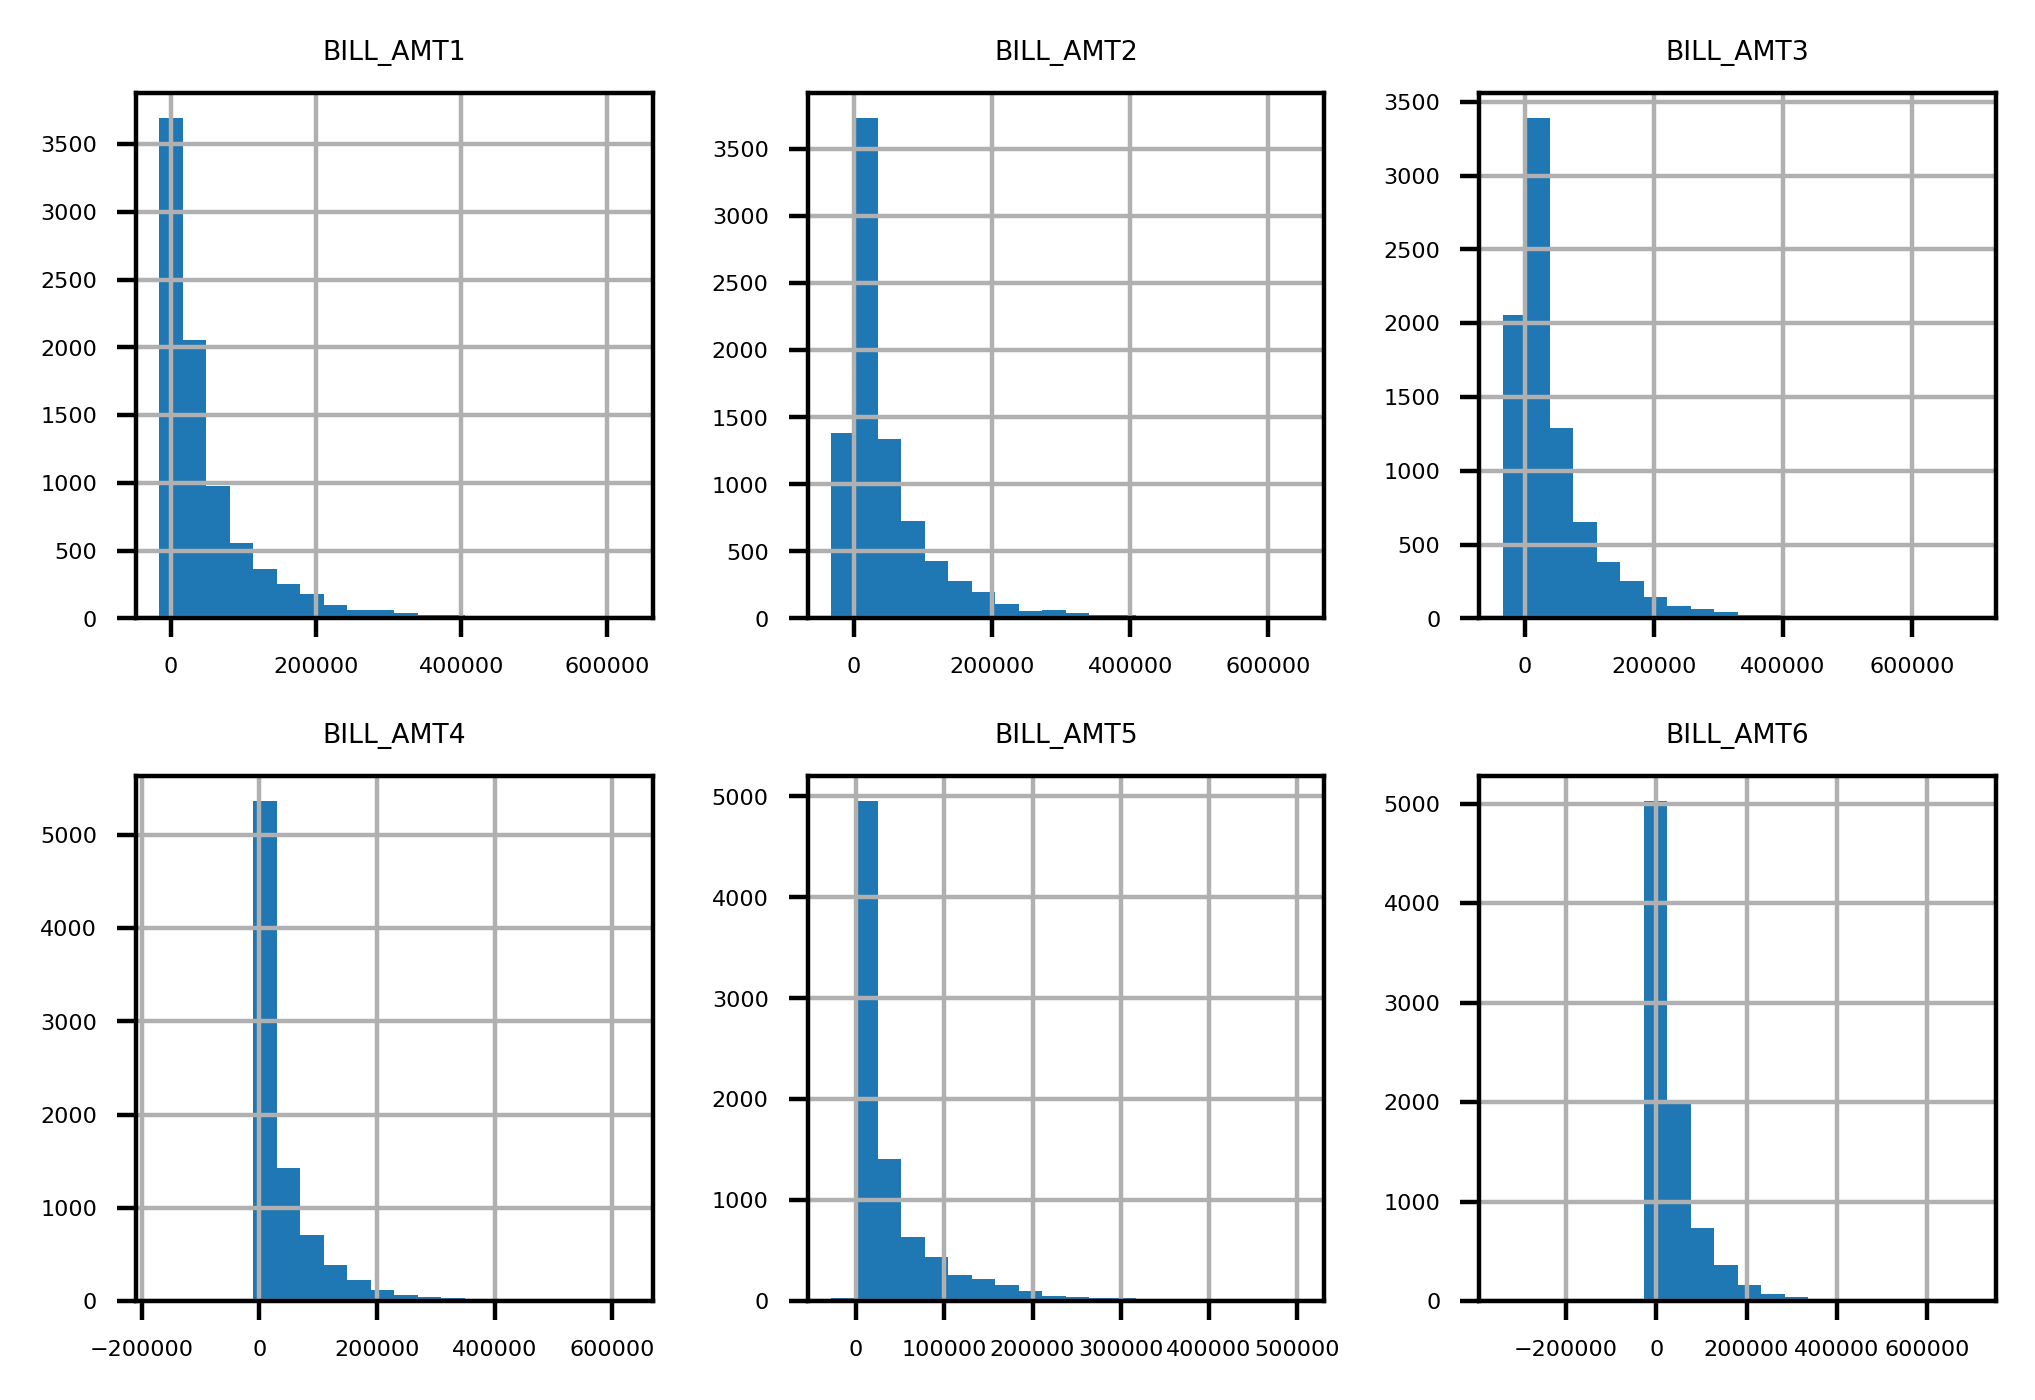

In [6]:
df[bill_feats].hist(bins=20 ,layout=(2,3))

________________________________________________________________________
**Next, obtain the `.describe()` summary of the payment amount features.**


In [7]:
df[pay_amt_feats].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,8417.000000,8417.000000,8417.000000,8417.000000,8417.000000,8416.000000
mean,5668.170726,5667.064988,4482.008673,4712.056909,4807.369966,5396.574026
std,15562.090803,17587.982058,13681.813761,14635.908462,14559.839027,19098.515379
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,899.000000,601.000000,278.000000,210.000000,199.000000,0.000000
50%,2125.000000,2000.000000,1500.000000,1500.000000,1500.000000,1390.000000
75%,5014.000000,5000.000000,4000.000000,4000.000000,4090.000000,4000.000000
max,405016.000000,385228.000000,417588.000000,497000.000000,326889.000000,528666.000000


    Does this make sense?

_______________________________________________________________________________________
**Next, plot a histogram of the bill payment features similar to the bill amount features, 
but also apply some rotation to the x-axis labels with the `xrot` keyword argument 
so that they don't overlap. In any plotting function, you can include the `xrot=<angle>`
keyword argument to rotate x-axis labels by a given angle in degrees.**


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4567de630>,
      dtype=object)

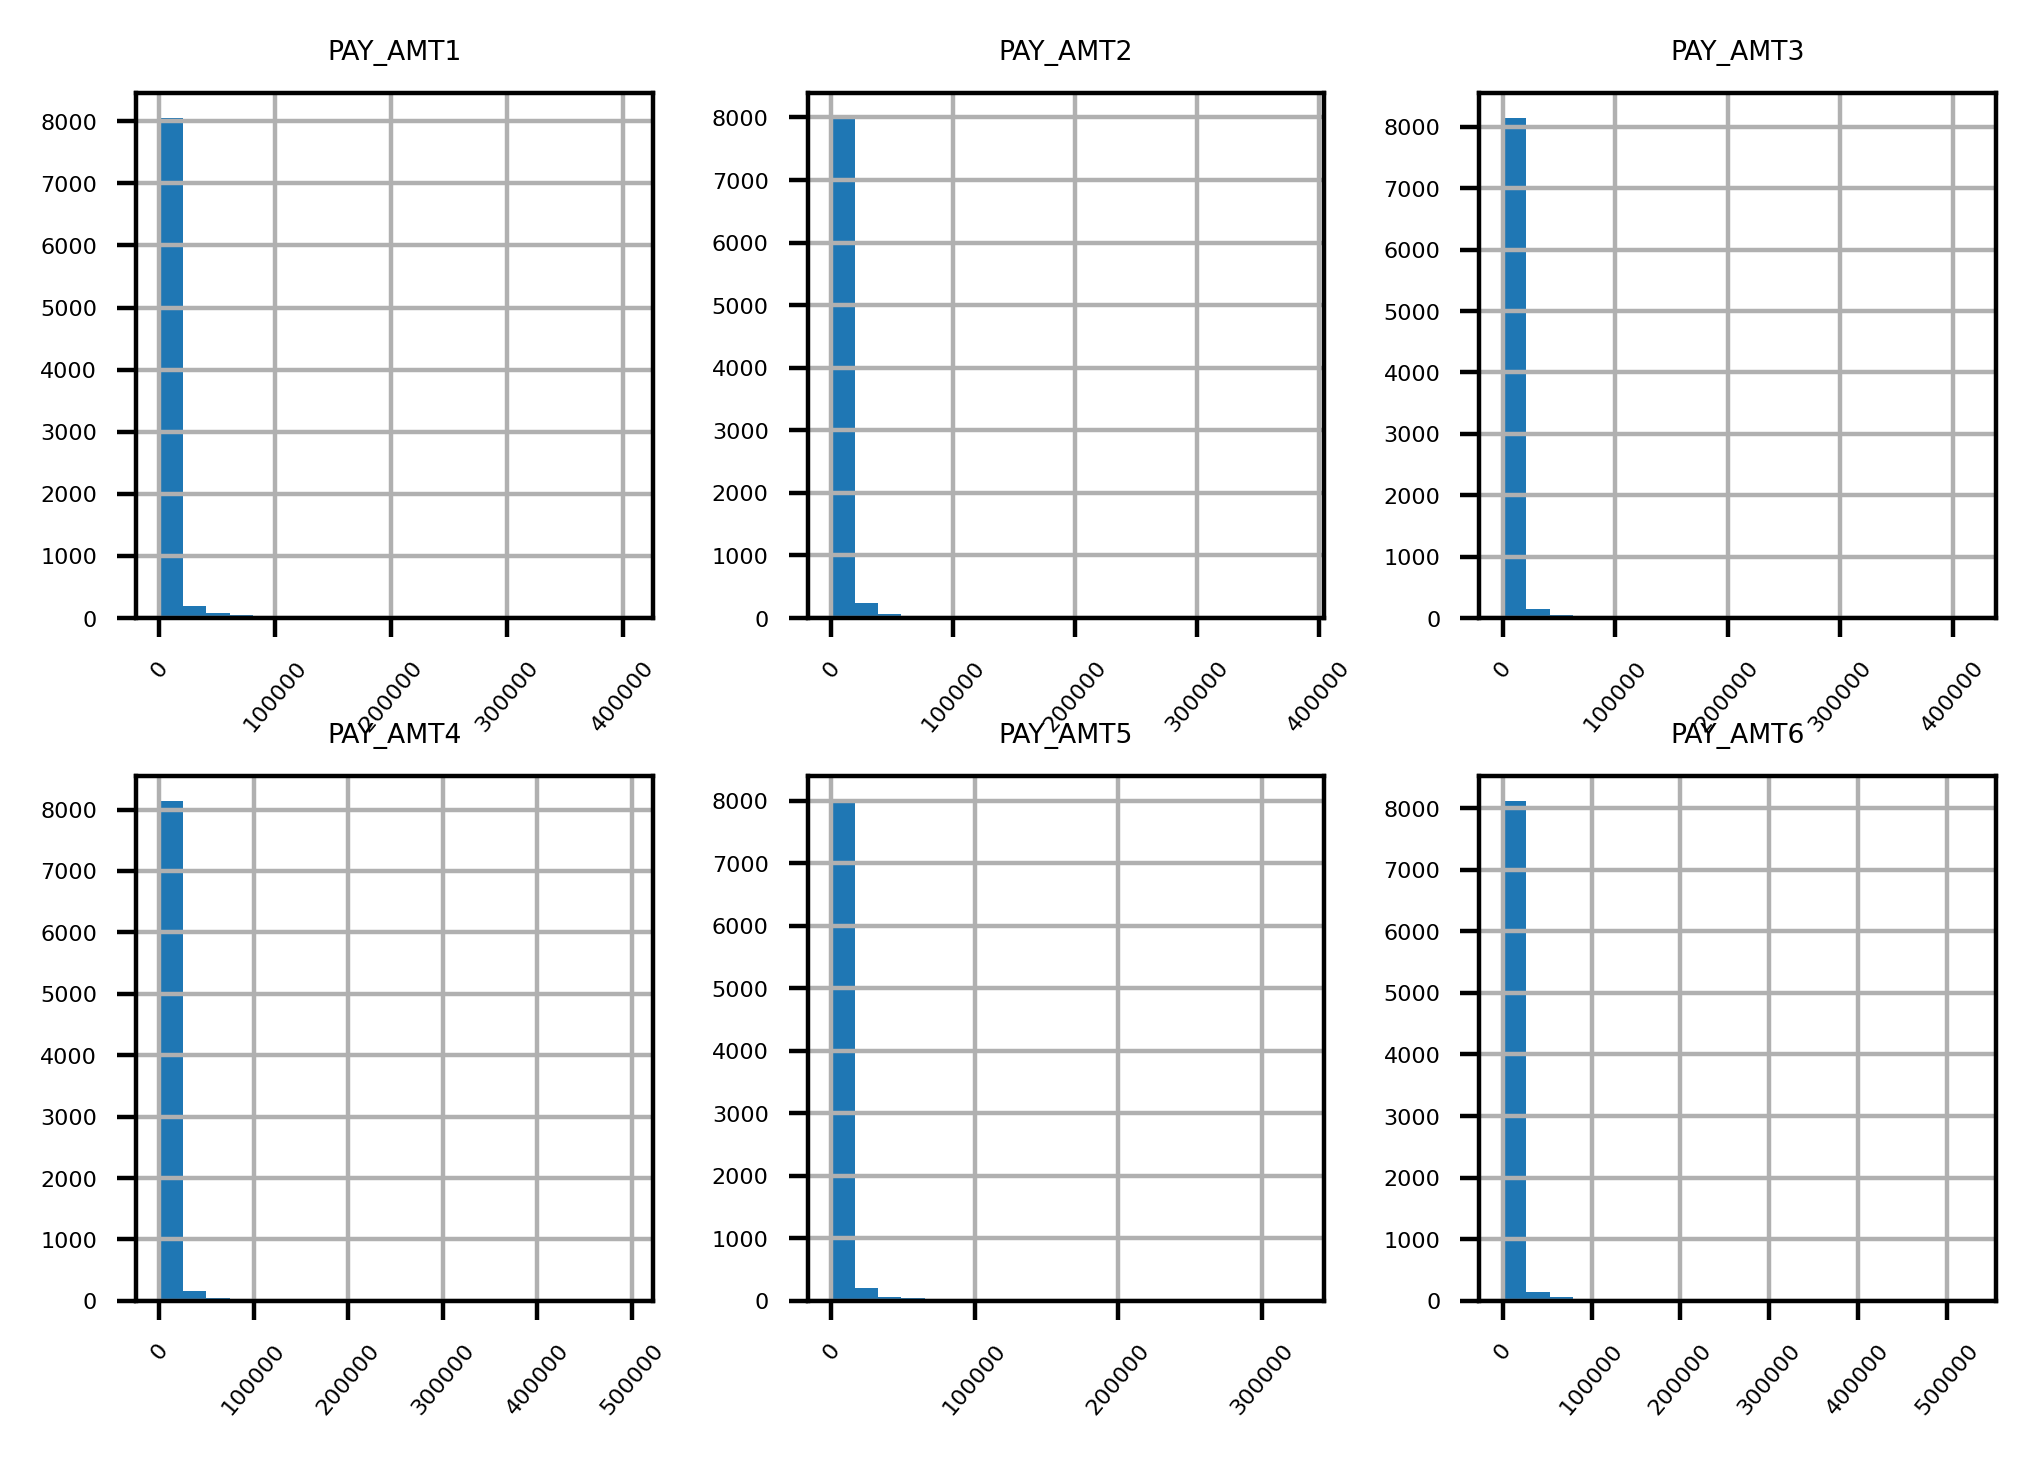

In [8]:
df[pay_amt_feats].hist(bins=20 ,layout=(2,3) ,xrot=50)

    Consider these results.

______________________________________________________________________________________________
**Then, use a Boolean mask to see how many of the payment amount data are exactly equal to 0. Review the results of the generated mask using `.head()` and `.sum()`.**



In [9]:
# Create Boolean mask
a=df[pay_amt_feats]==0
a

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,True,False,True,True,True,True
1,True,False,False,False,True,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
8412,False,False,False,False,False,False
8413,False,False,False,False,False,False
8414,False,False,False,False,True,False
8415,False,True,False,False,False,False


In [10]:
# Use `.head()`
a.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,True,False,True,True,True,True
1,True,False,False,False,True,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [11]:
# Use `.sum()`
a.sum()

PAY_AMT1    1514
PAY_AMT2    1626
PAY_AMT3    1774
PAY_AMT4    1862
PAY_AMT5    1932
PAY_AMT6    2146
dtype: int64

     Does this make sense given the histogram in the previous step?

_______________________________________________________________________________________________________________________________
**Finally, ignoring the payments of 0 using the mask you created in the previous step, use pandas `.apply()` and NumPy's `np.log10()` to plot histograms of logarithmic transformations of the non-zero payments.**
> Hint: You can use `.apply()` to apply any function, including `log10`, to all the elements of a DataFrame or a column using the following syntax: `.apply(<function_name>)`.

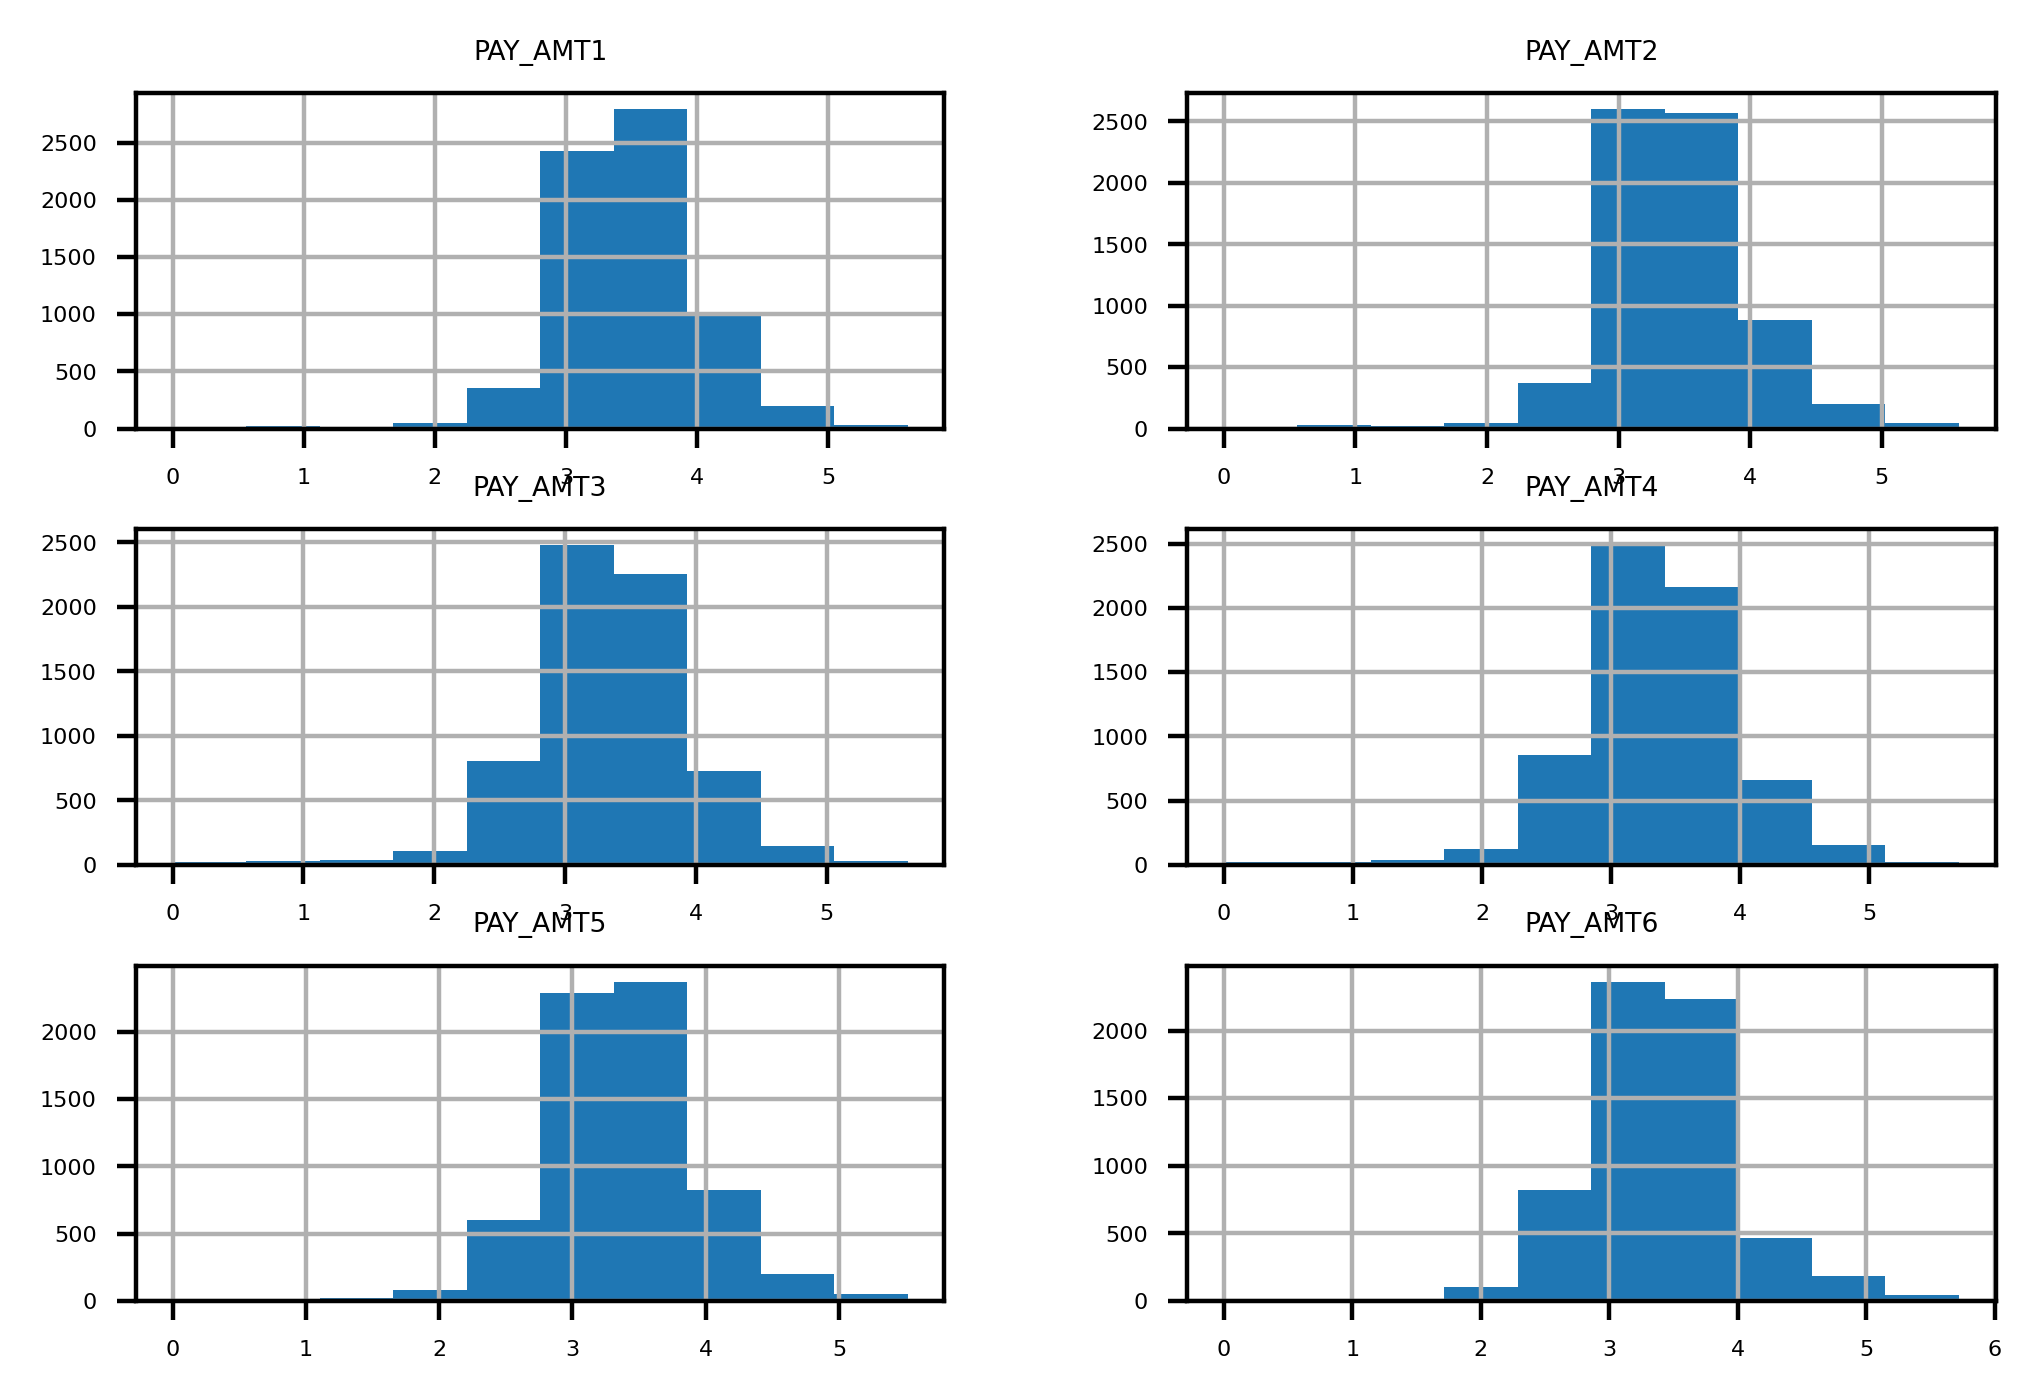

In [14]:
df[pay_amt_feats][~a].apply(lambda x: np.log10(x)).hist()
plt.show()